In [51]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv("police_deaths_USA_v6.csv")

In [18]:
df.head()

,Rank,Name,Age,End_Of_Watch,Day_Of_Week,Cause,Department,State,Tour,Badge,Weapon,Offender,Summary
0,Constable,Darius Quimby,NaN,1791-01-03,Monday,Stabbed,"Albany County Constable's Office, New York",New York,NaN,NaN,Edged weapon; Knife,Executed in 1791,Constable Darius Quimby was stabbed to death w...
1,Sheriff,Cornelius Hogeboom,53.0,1791-10-22,Saturday,Gunfire,"Columbia County Sheriff's Office, New York",New York,2 years,NaN,Gun; Unknown type,Acquitted,Sheriff Cornelius Hogeboom was shot and killed...
2,Deputy Sheriff,Isaac Smith,NaN,1792-05-17,Thursday,Gunfire,"Westchester County Sheriff's Department, New York",New York,NaN,NaN,Handgun,Executed in 1793,Deputy Sheriff Isaac Smith was shot and killed...
3,Marshal,Robert Forsyth,40.0,1794-01-11,Saturday,Gunfire,United States Department of Justice - United S...,United States,"4 years, 4 months",4,Handgun; Pistol,Escaped,"Marshal Robert Forsyth, believed to be one of ..."
4,Deputy Sheriff,Robert Berwick,NaN,1797-06-29,Thursday,Gunfire,"New York County Sheriff's Office, New York",New York,NaN,NaN,Handgun,Executed in 1797,Deputy Sheriff Robert Berwick was shot and kil...


In [19]:
df.columns

Index(['Rank', 'Name', 'Age', 'End_Of_Watch', 'Day_Of_Week', 'Cause',
       'Department', 'State', 'Tour', 'Badge', 'Weapon', 'Offender',
       'Summary'],
      dtype='object')

In [41]:
print("Valores faltantes por columna:")
print(df.isnull().sum())

Valores faltantes por columna:
Rank                0
Name                0
Age                 0
End_Of_Watch        0
Day_Of_Week         0
Cause               1
Department          0
State               0
Tour             6206
Badge           15703
Weapon           8543
Offender        10605
Summary             0
dtype: int64


In [6]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25623 entries, 0 to 25622
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          25623 non-null  object 
 1   Name          25623 non-null  object 
 2   Age           22946 non-null  float64
 3   End_Of_Watch  25623 non-null  object 
 4   Day_Of_Week   25623 non-null  object 
 5   Cause         25622 non-null  object 
 6   Department    25623 non-null  object 
 7   State         25623 non-null  object 
 8   Tour          17417 non-null  object 
 9   Badge         7477 non-null   object 
 10  Weapon        16263 non-null  object 
 11  Offender      13803 non-null  object 
 12  Summary       25623 non-null  object 
dtypes: float64(1), object(12)
memory usage: 2.5+ MB


In [20]:
df.dtypes

Rank             object
Name             object
Age             float64
End_Of_Watch     object
Day_Of_Week      object
Cause            object
Department       object
State            object
Tour             object
Badge            object
Weapon           object
Offender         object
Summary          object
dtype: object

In [22]:
df.isna().sum()

Rank                0
Name                0
Age              2677
End_Of_Watch        0
Day_Of_Week         0
Cause               1
Department          0
State               0
Tour             8206
Badge           18146
Weapon           9360
Offender        11820
Summary             0
dtype: int64

In [23]:
df["Age"]

0         NaN
1        53.0
2         NaN
3        40.0
4         NaN
         ... 
25618    52.0
25619    48.0
25620    33.0
25621    38.0
25622    32.0
Name: Age, Length: 25623, dtype: float64

In [26]:
df = df.dropna(subset=['Age'])

In [27]:
df['Age'] = df['Age'].astype(int)

In [28]:
print("df['Age'].astype(int)")
print(df.info())
print(df['Age'].describe())

df['Age'].astype(int)
<class 'pandas.core.frame.DataFrame'>
Index: 22946 entries, 1 to 25622
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rank          22946 non-null  object        
 1   Name          22946 non-null  object        
 2   Age           22946 non-null  int32         
 3   End_Of_Watch  22946 non-null  datetime64[ns]
 4   Day_Of_Week   22946 non-null  object        
 5   Cause         22945 non-null  object        
 6   Department    22946 non-null  object        
 7   State         22946 non-null  object        
 8   Tour          16740 non-null  object        
 9   Badge         7243 non-null   object        
 10  Weapon        14403 non-null  object        
 11  Offender      12341 non-null  object        
 12  Summary       22946 non-null  object        
dtypes: datetime64[ns](1), int32(1), object(11)
memory usage: 2.4+ MB
None
count    22946.000000
mean        40.289419
std  

In [29]:
df.head()

,Rank,Name,Age,End_Of_Watch,Day_Of_Week,Cause,Department,State,Tour,Badge,Weapon,Offender,Summary
1,Sheriff,Cornelius Hogeboom,53,1791-10-22,Saturday,Gunfire,"Columbia County Sheriff's Office, New York",New York,2 years,NaN,Gun; Unknown type,Acquitted,Sheriff Cornelius Hogeboom was shot and killed...
3,Marshal,Robert Forsyth,40,1794-01-11,Saturday,Gunfire,United States Department of Justice - United S...,United States,"4 years, 4 months",4,Handgun; Pistol,Escaped,"Marshal Robert Forsyth, believed to be one of ..."
5,Sheriff,Robert Maxwell,45,1797-11-12,Sunday,Gunfire,"Washington District Sheriff's Office, South Ca...",South Carolina,NaN,NaN,Gun; Unknown type,Acquitted,Sheriff Robert Maxwell was shot and killed aft...
6,Superintendent,Hilary Baker,52,1798-09-25,Tuesday,Duty related illness,"Philadelphia Police Department, Pennsylvania",Pennsylvania,"1 year, 4 months",SUPERINTEN,NaN,NaN,Superindentent Hilary Baker died as a result o...
7,High Sheriff,John Caldwell Cook,74,1804-10-16,Tuesday,Gunfire,"Mecklenburg County Sheriff's Office, North Car...",North Carolina,10 months,NaN,Gun; Unknown type,NaN,High Sheriff John Cook was shot in the head an...


In [30]:
df["Rank"]

1               Sheriff
3               Marshal
5               Sheriff
6        Superintendent
7          High Sheriff
              ...      
25618    Police Officer
25619    Deputy Sheriff
25620        K9 Officer
25621        K9 Officer
25622        K9 Officer
Name: Rank, Length: 22946, dtype: object

In [31]:
df = df.dropna(subset=['Rank'])

In [40]:
df["State"]

1              New York
3         United States
5        South Carolina
6          Pennsylvania
7        North Carolina
              ...      
25618        Washington
25619    North Carolina
25620         Wisconsin
25621    North Carolina
25622    North Carolina
Name: State, Length: 22946, dtype: object

In [48]:
df.head()

,Rank,Name,Age,End_Of_Watch,Day_Of_Week,Cause,Department,State,Tour,Badge,Weapon,Offender,Summary
0,Constable,Darius Quimby,NaN,1791-01-03,Monday,Stabbed,"Albany County Constable's Office, New York",New York,NaN,NaN,Edged weapon; Knife,Executed in 1791,Constable Darius Quimby was stabbed to death w...
1,Sheriff,Cornelius Hogeboom,53.0,1791-10-22,Saturday,Gunfire,"Columbia County Sheriff's Office, New York",New York,2 years,NaN,Gun; Unknown type,Acquitted,Sheriff Cornelius Hogeboom was shot and killed...
2,Deputy Sheriff,Isaac Smith,NaN,1792-05-17,Thursday,Gunfire,"Westchester County Sheriff's Department, New York",New York,NaN,NaN,Handgun,Executed in 1793,Deputy Sheriff Isaac Smith was shot and killed...
3,Marshal,Robert Forsyth,40.0,1794-01-11,Saturday,Gunfire,United States Department of Justice - United S...,United States,"4 years, 4 months",4,Handgun; Pistol,Escaped,"Marshal Robert Forsyth, believed to be one of ..."
4,Deputy Sheriff,Robert Berwick,NaN,1797-06-29,Thursday,Gunfire,"New York County Sheriff's Office, New York",New York,NaN,NaN,Handgun,Executed in 1797,Deputy Sheriff Robert Berwick was shot and kil...


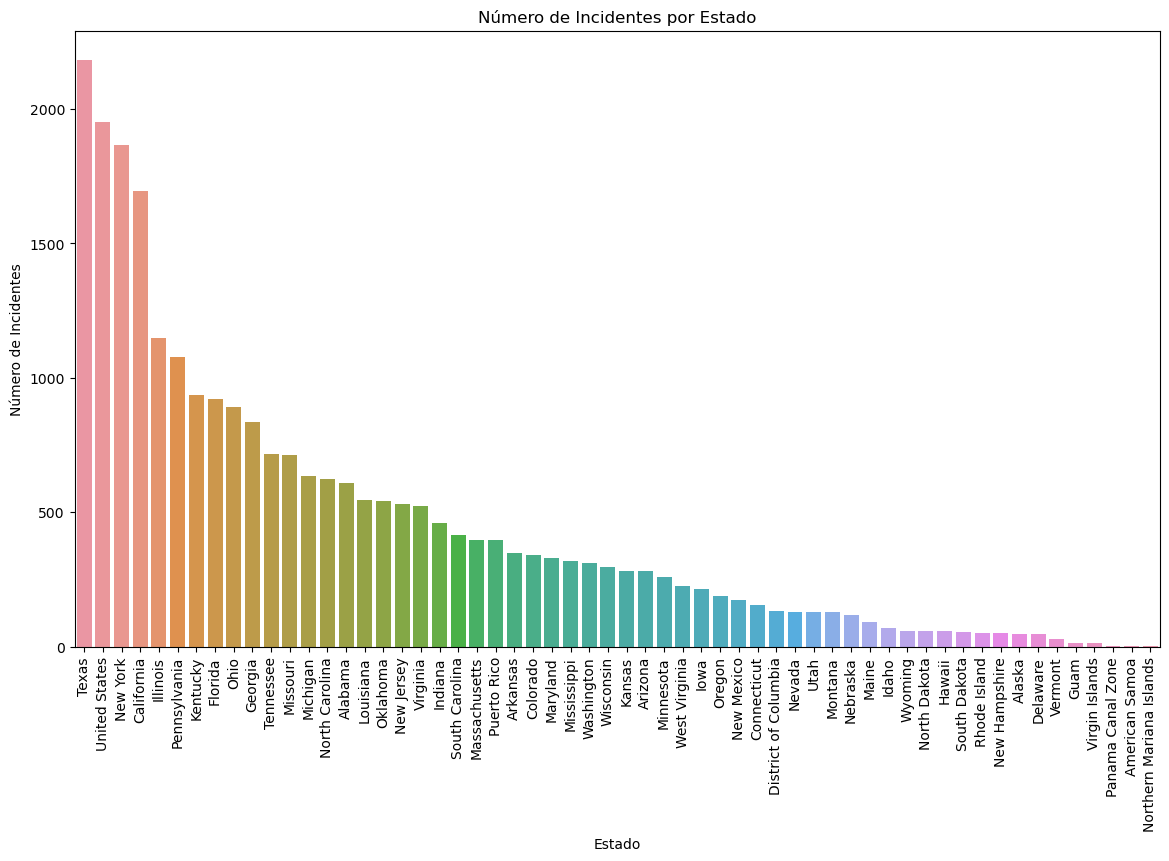

In [56]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='State', order=df['State'].value_counts().index)
plt.title('Número de Incidentes por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=90)
plt.show()